# Customer Sales Data Project

### The purpose of this project is to analyze how sales are distributed across the country with the purpose of identifying where the top spending customers are located as well as lower spending customer. This may allow us to identify areas of the country where strategic marketing may be focused on in hopes of driving sales in those areas and markets.

In [44]:
#import libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [45]:
#read in data set and view first 5 rows
data = pd.read_csv('superstore_final_dataset_utf8.csv')
data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [46]:
#understand the data and types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

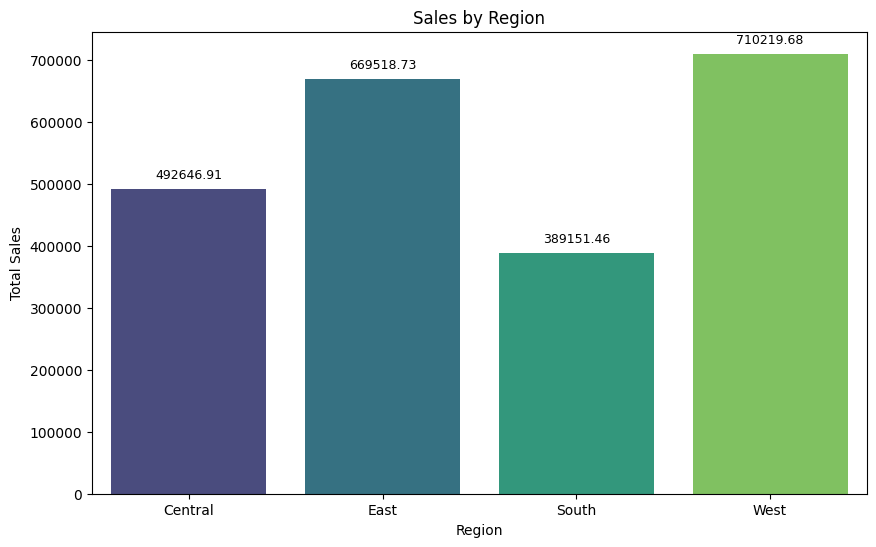

In [47]:
# Analyzing Sales by Region
sales_by_region = data.groupby('Region')['Sales'].sum().reset_index()

# Plotting the sales by region
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Region', y='Sales', data=sales_by_region, palette='viridis')

# Labeling each region with its total sales
for p in bar_plot.patches:
    bar_plot.annotate(p.get_height().round(2), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 10), 
                      textcoords='offset points',
                      fontsize=9)

plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


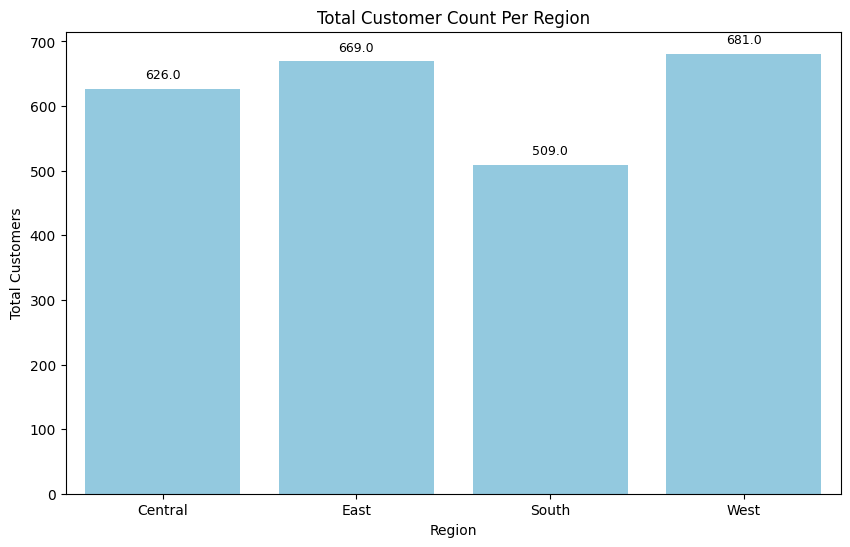

In [48]:
# Calculating total customer count per region
customer_count_per_region = data.groupby('Region')['Customer_ID'].nunique().reset_index()
customer_count_per_region.columns = ['Region', 'Total Customers']

# Plotting a simple bar chart for total customer count per region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total Customers', data=customer_count_per_region, color='skyblue')

# Adding labels for total customers
for p in plt.gca().patches:
    plt.gca().annotate(p.get_height(),
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points',
                       fontsize=9)

plt.title('Total Customer Count Per Region')
plt.xlabel('Region')
plt.ylabel('Total Customers')
plt.show()


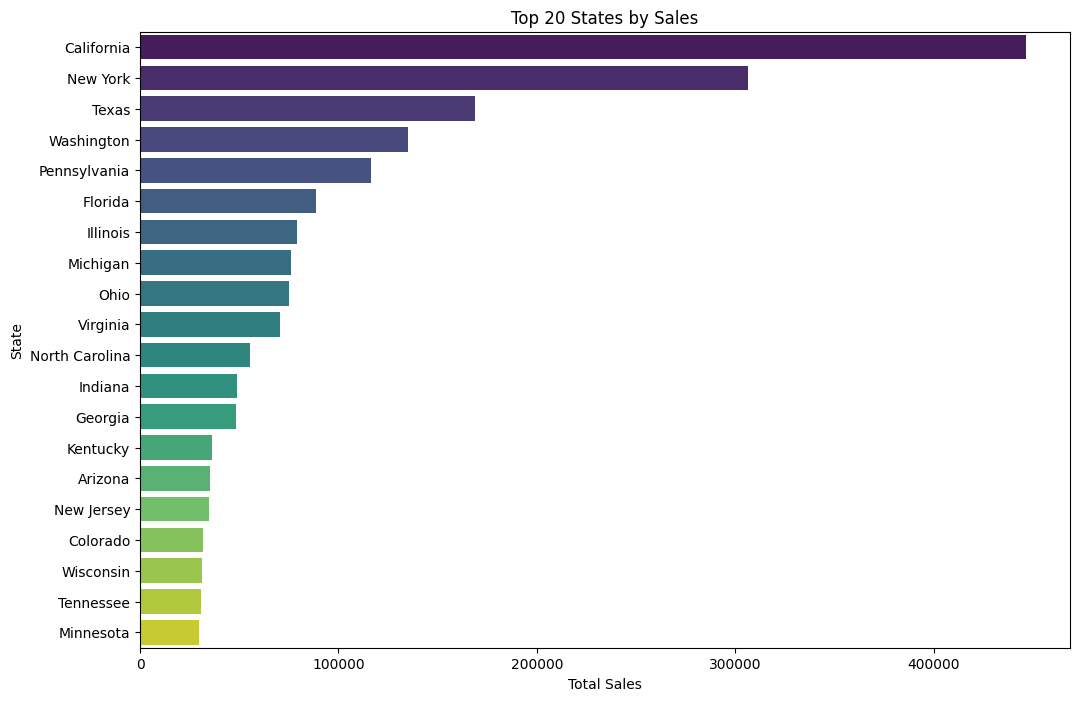

In [49]:
# Analyzing Sales by State
sales_by_state = data.groupby('State')['Sales'].sum().reset_index()

# Sorting by sales to get the top 20 states
top_20_states_by_sales = sales_by_state.sort_values(by='Sales', ascending=False).head(20)

# Plotting the sales by top 20 states
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='State', data=top_20_states_by_sales, palette='viridis')
plt.title('Top 20 States by Sales')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()


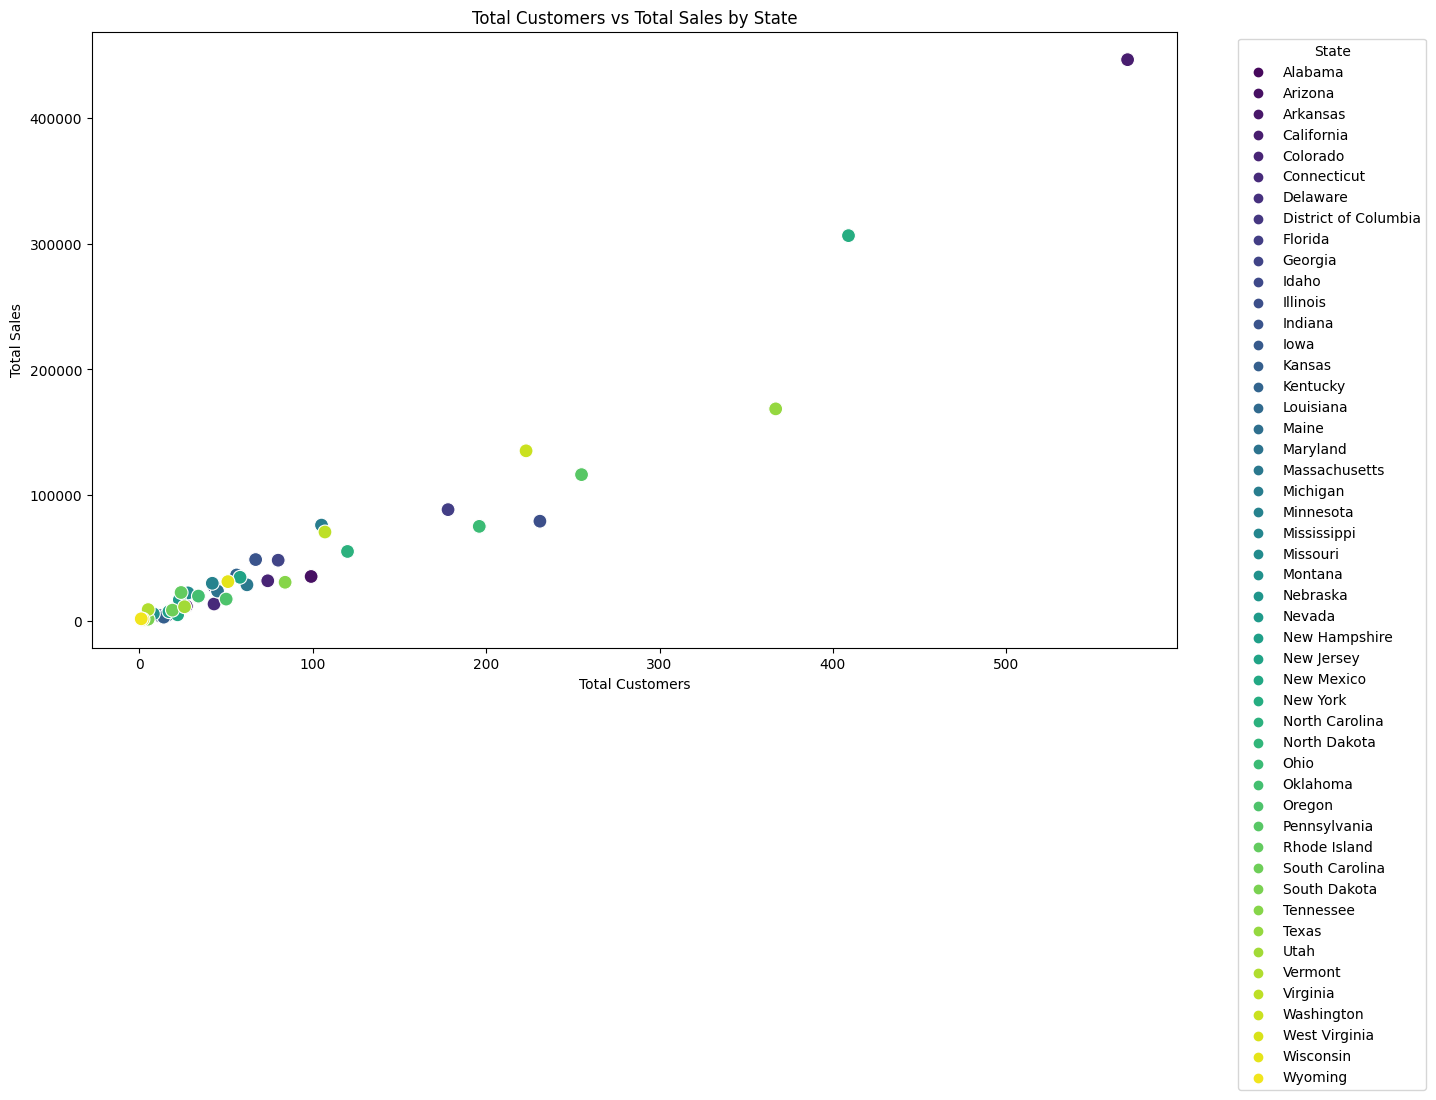

In [50]:
# Calculating the total number of customers in each state
customers_by_state = data.groupby('State')['Customer_ID'].nunique().reset_index()
customers_by_state.rename(columns={'Customer_ID': 'Total_Customers'}, inplace=True)

# Merging the customers and sales data by state
state_analysis = pd.merge(customers_by_state, sales_by_state, on='State')

# Plotting the total number of customers vs total sales for each state
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Total_Customers', y='Sales', hue='State', data=state_analysis, palette='viridis', s=100)
plt.title('Total Customers vs Total Sales by State')
plt.xlabel('Total Customers')
plt.ylabel('Total Sales')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [51]:
# Creating a DataFrame to store the total number of customers and sales for each region
region_analysis = data.groupby('Region').agg(
    Total_Customers=pd.NamedAgg(column='Customer_ID', aggfunc='nunique'),
    Sales=pd.NamedAgg(column='Sales', aggfunc='sum')
).reset_index()

region_analysis






,Region,Total_Customers,Sales
0,Central,626,492646.9132
1,East,669,669518.7260
2,South,509,389151.4590
3,West,681,710219.6845


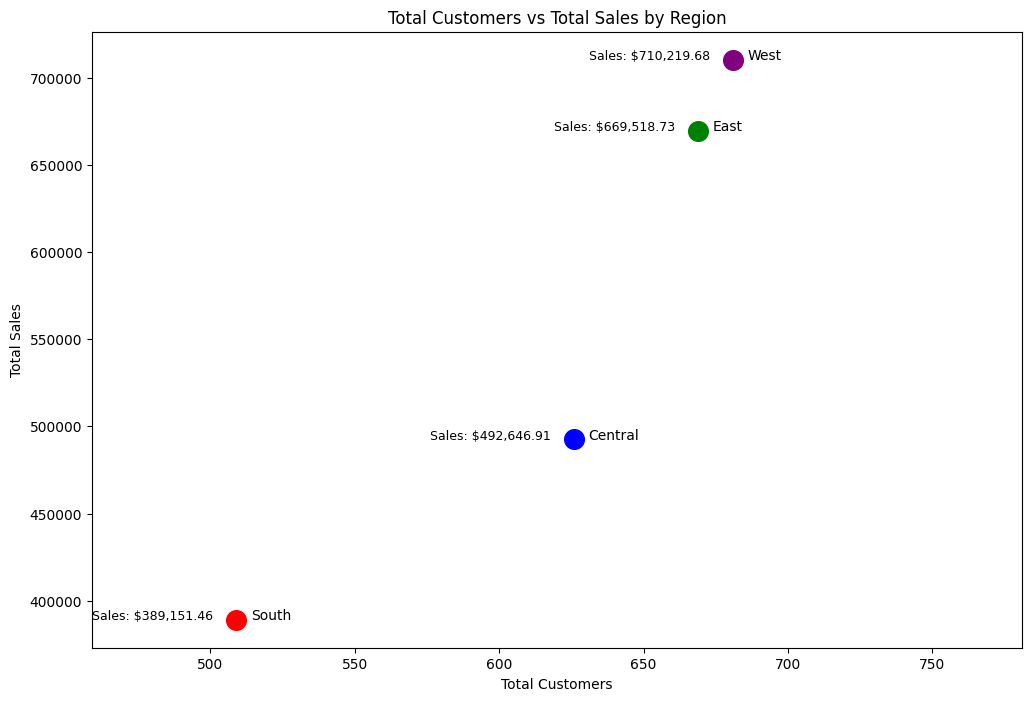

In [52]:
# Defining unique colors for each region
colors = ['blue', 'green', 'red', 'purple']

# Plotting the total number of customers vs total sales for each region with labels for regions and total sales
plt.figure(figsize=(12, 8))
for i, region in enumerate(region_analysis['Region']):
    plt.scatter(region_analysis['Total_Customers'][i], region_analysis['Sales'][i], s=200, color=colors[i])
    plt.text(region_analysis['Total_Customers'][i] + 5, region_analysis['Sales'][i], region, fontsize=10)
    plt.text(region_analysis['Total_Customers'][i] - 50, region_analysis['Sales'][i], f"Sales: ${region_analysis['Sales'][i]:,.2f}", fontsize=9)

plt.title('Total Customers vs Total Sales by Region')
plt.xlabel('Total Customers')
plt.ylabel('Total Sales')

# Expanding the x-axis limit to ensure the labels are not cut off
plt.xlim(min(region_analysis['Total_Customers']) - 50, max(region_analysis['Total_Customers']) + 100)

plt.show()


In [53]:
# Function to get top 3 and bottom 3 sub-categories by sales for each region
def get_top_bottom_sub_categories(region_data):
    sorted_sub_categories = region_data.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False)
    top_3_sub_categories = sorted_sub_categories.head(3)
    bottom_3_sub_categories = sorted_sub_categories.tail(3)
    return top_3_sub_categories, bottom_3_sub_categories

# Creating a DataFrame to store the results for sub-categories
top_bottom_sub_categories_by_region = pd.DataFrame(columns=[
    'Region', 'Top 3 Sub-Categories', 'Top 3 Sales', 'Bottom 3 Sub-Categories', 'Bottom 3 Sales'
])

# Iterating through each region to get the top 3 and bottom 3 sub-categories
for region in data['Region'].unique():
    region_data = data[data['Region'] == region]
    top_3_sub_categories, bottom_3_sub_categories = get_top_bottom_sub_categories(region_data)
    
    top_bottom_sub_categories_by_region = top_bottom_sub_categories_by_region.append({
        'Region': region,
        'Top 3 Sub-Categories': ', '.join(top_3_sub_categories.index),
        'Top 3 Sales': top_3_sub_categories.sum(),
        'Bottom 3 Sub-Categories': ', '.join(bottom_3_sub_categories.index),
        'Bottom 3 Sales': bottom_3_sub_categories.sum()
    }, ignore_index=True)

top_bottom_sub_categories_by_region


C:\Users\Ramon\AppData\Local\Temp\ipykernel_16688\2503670893.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_bottom_sub_categories_by_region = top_bottom_sub_categories_by_region.append({
C:\Users\Ramon\AppData\Local\Temp\ipykernel_16688\2503670893.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_bottom_sub_categories_by_region = top_bottom_sub_categories_by_region.append({
C:\Users\Ramon\AppData\Local\Temp\ipykernel_16688\2503670893.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_bottom_sub_categories_by_region = top_bottom_sub_categories_by_region.append({
C:\Users\Ramon\AppData\Local\Temp\ipykernel_16688\2503670893.py:18: FutureWarning: The frame.append method is deprecated and will be removed f

,Region,Top 3 Sub-Categories,Top 3 Sales,Bottom 3 Sub-Categories,Bottom 3 Sales
0,South,"Phones, Machines, Chairs",156728.544,"Envelopes, Labels, Fasteners",6193.052
1,West,"Chairs, Phones, Tables",278898.922,"Labels, Envelopes, Fasteners",10029.392
2,Central,"Chairs, Phones, Binders",211177.740,"Envelopes, Labels, Fasteners",7742.410
3,East,"Phones, Chairs, Storage",265000.827,"Envelopes, Labels, Fasteners",7512.878


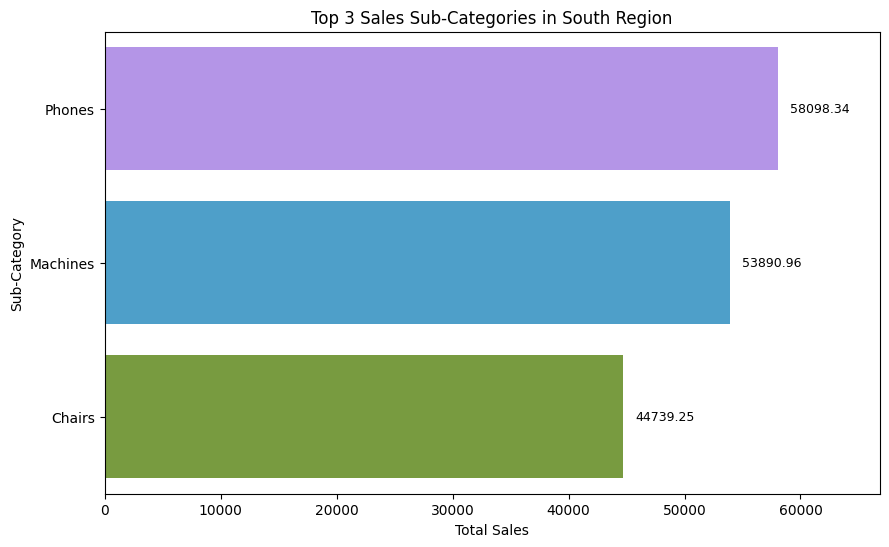

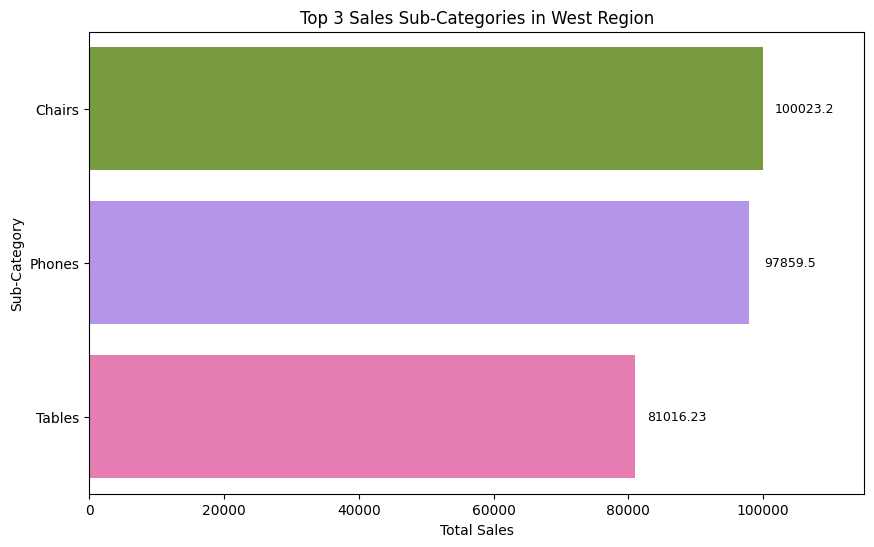

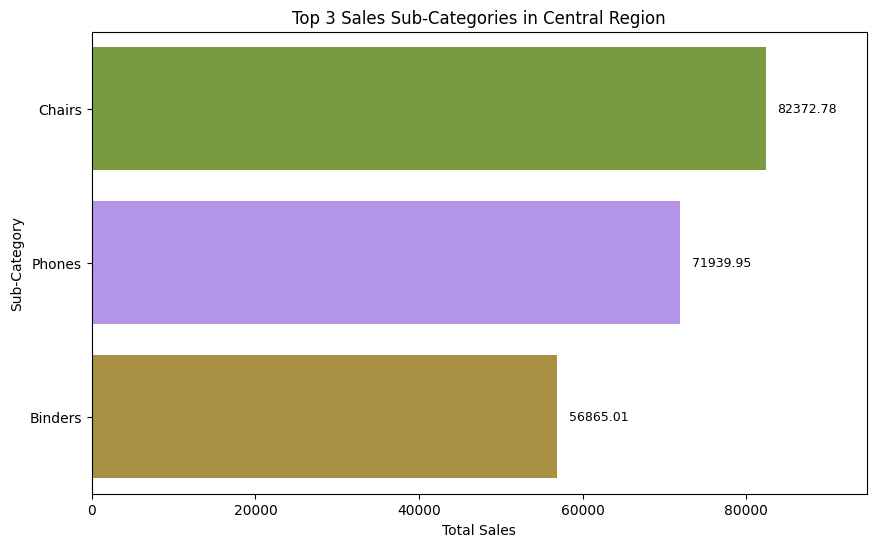

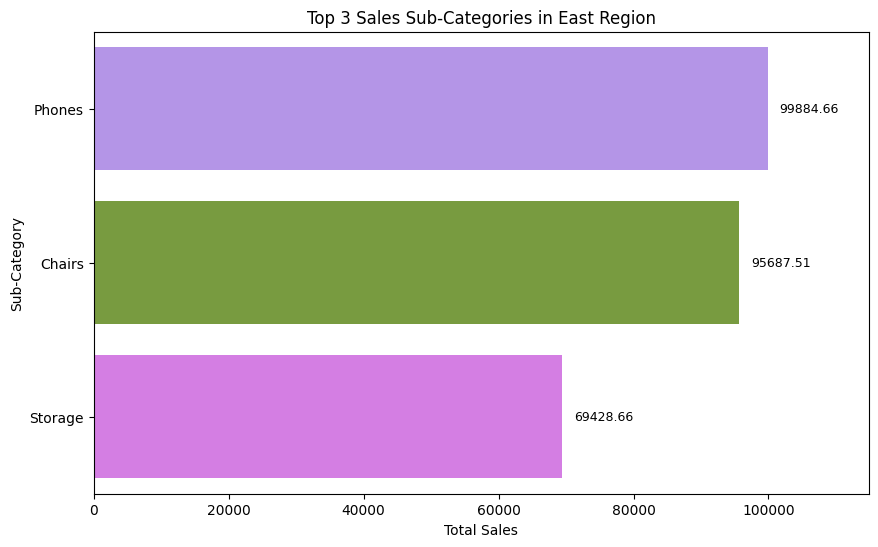

In [54]:
# # Plotting horizontal bar graphs for the top 3 sub-categories for each region
# for region in data['Region'].unique():
#     region_data = data[data['Region'] == region]
#     top_3_sub_categories, _ = get_top_bottom_sub_categories(region_data)
#     # Creating a DataFrame for plotting
#     region_top_3_sub_categories = pd.DataFrame({
#         'Sub-Category': top_3_sub_categories.index,
#         'Sales': top_3_sub_categories.values
#     })
#     # Plotting horizontal bar graph for the region
#     plt.figure(figsize=(10, 6))
#     bar_plot = sns.barplot(x='Sales', y='Sub-Category', data=region_top_3_sub_categories, palette='viridis')
#     # Adding labels for sales, spaced away from the bars
#     for p in bar_plot.patches:
#         bar_plot.annotate(p.get_width().round(2),
#                           (p.get_width(), p.get_y() + p.get_height() / 2),
#                           ha='center', va='center',
#                           xytext=(30, 0),  # Increased spacing from the bars
#                           textcoords='offset points',
#                           fontsize=9)
#     # Adjusting x-limit to avoid cutting off sales figures
#     plt.xlim(0, max(region_top_3_sub_categories['Sales']) * 1.15)  # Adjusted to accommodate spaced labels
#     plt.title(f'Top 3 Sales Sub-Categories in {region} Region')
#     plt.xlabel('Total Sales')
#     plt.ylabel('Sub-Category')
#     plt.show()

# Define custom color mapping for each unique sub-category
sub_categories = data.groupby('Sub_Category')['Sales'].sum().index
palette = sns.color_palette('husl', n_colors=len(sub_categories))
color_mapping = dict(zip(sub_categories, palette))

# Plotting horizontal bar graphs for the top 3 sub-categories for each region
for region in data['Region'].unique():
    region_data = data[data['Region'] == region]
    top_3_sub_categories, _ = get_top_bottom_sub_categories(region_data)
    # Creating a DataFrame for plotting
    region_top_3_sub_categories = pd.DataFrame({
        'Sub-Category': top_3_sub_categories.index,
        'Sales': top_3_sub_categories.values
    })
    custom_palette = region_top_3_sub_categories['Sub-Category'].map(color_mapping)
    # Plotting horizontal bar graph for the region
    plt.figure(figsize=(10, 6))
    bar_plot = sns.barplot(x='Sales', y='Sub-Category', data=region_top_3_sub_categories, palette=custom_palette)
    # Adding labels for sales, spaced away from the bars
    for p in bar_plot.patches:
        bar_plot.annotate(p.get_width().round(2),
                          (p.get_width(), p.get_y() + p.get_height() / 2),
                          ha='center', va='center',
                          xytext=(30, 0),
                          textcoords='offset points',
                          fontsize=9)
    # Adjusting x-limit to avoid cutting off sales figures
    plt.xlim(0, max(region_top_3_sub_categories['Sales']) * 1.15)
    plt.title(f'Top 3 Sales Sub-Categories in {region} Region')
    plt.xlabel('Total Sales')
    plt.ylabel('Sub-Category')
    plt.show()



In [55]:
# Creating a DataFrame to store the results for top 3 products for each top 3 sub-categories in each region, including total sales
top_products_by_sub_category_region_with_sales = pd.DataFrame(columns=[
    'Region', 'Sub-Category', 'Top 3 Products', 'Total Sales'
])

# Iterating through each region
for region in data['Region'].unique():
    region_data = data[data['Region'] == region]
    top_3_sub_categories, _ = get_top_bottom_sub_categories(region_data)
    
    # Iterating through the top 3 sub-categories to find the top 3 products with total sales
    for sub_category in top_3_sub_categories.index:
        sub_category_data = region_data[region_data['Sub_Category'] == sub_category]
        top_3_products_sales = sub_category_data.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(3)
        
        top_3_products_with_sales = ', '.join([f"{product} (${sales:.2f})" for product, sales in top_3_products_sales.iteritems()])
        
        top_products_by_sub_category_region_with_sales = top_products_by_sub_category_region_with_sales.append({
            'Region': region,
            'Sub-Category': sub_category,
            'Top 3 Products': top_3_products_with_sales,
            'Total Sales': top_3_products_sales.sum()
        }, ignore_index=True)

top_products_by_sub_category_region_with_sales


C:\Users\Ramon\AppData\Local\Temp\ipykernel_16688\4183313643.py:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  top_3_products_with_sales = ', '.join([f"{product} (${sales:.2f})" for product, sales in top_3_products_sales.iteritems()])
C:\Users\Ramon\AppData\Local\Temp\ipykernel_16688\4183313643.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_products_by_sub_category_region_with_sales = top_products_by_sub_category_region_with_sales.append({
C:\Users\Ramon\AppData\Local\Temp\ipykernel_16688\4183313643.py:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  top_3_products_with_sales = ', '.join([f"{product} (${sales:.2f})" for product, sales in top_3_products_sales.iteritems()])
C:\Users\Ramon\AppData\Local\Temp\ipykernel_16688\4183313643.py:18: FutureWarning: The frame.append meth

,Region,Sub-Category,Top 3 Products,Total Sales
0,South,Phones,"Samsung Galaxy Mega 6.3 ($7307.83), Samsung Ga...",13747.672
1,South,Machines,Cisco TelePresence System EX90 Videoconferenci...,42013.395
2,South,Chairs,"High-Back Leather Managers Chair ($2859.78), H...",8237.520
3,West,Chairs,Global Troy Executive Leather Low-Back Tilter ...,23794.576
4,West,Phones,"Samsung Galaxy Mega 6.3 ($5375.87), Apple iPho...",15443.312
5,West,Tables,Bretford Rectangular Conference Table Tops ($7...,17517.581
6,Central,Chairs,HON 5400 Series Task Chairs for Big and Tall (...,14278.596
7,Central,Phones,"Mitel MiVoice 5330e IP Phone ($4179.85), Polyc...",10352.424
8,Central,Binders,Ibico EPK-21 Electric Binding System ($11339.9...,30703.996
9,East,Phones,"Apple iPhone 5 ($7797.96), Wilson SignalBoost ...",14049.416


In [56]:
# Creating a DataFrame to store the results for top 3 postal codes by sales in each region
top_postal_codes_by_region = pd.DataFrame(columns=['Region', 'Top 3 Postal Codes', 'Total Sales'])

# Iterating through each region
for region in data['Region'].unique():
    region_data = data[data['Region'] == region]
    top_3_postal_codes_sales = region_data.groupby('Postal_Code')['Sales'].sum().sort_values(ascending=False).head(3)

    top_3_postal_codes_with_sales = ', '.join([f"{int(postal_code)} (${sales:.2f})" for postal_code, sales in top_3_postal_codes_sales.iteritems()])

    top_postal_codes_by_region = top_postal_codes_by_region.append({
        'Region': region,
        'Top 3 Postal Codes': top_3_postal_codes_with_sales,
        'Total Sales': top_3_postal_codes_sales.sum()
    }, ignore_index=True)

top_postal_codes_by_region.head()


C:\Users\Ramon\AppData\Local\Temp\ipykernel_16688\615924491.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  top_3_postal_codes_with_sales = ', '.join([f"{int(postal_code)} (${sales:.2f})" for postal_code, sales in top_3_postal_codes_sales.iteritems()])
C:\Users\Ramon\AppData\Local\Temp\ipykernel_16688\615924491.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_postal_codes_by_region = top_postal_codes_by_region.append({
C:\Users\Ramon\AppData\Local\Temp\ipykernel_16688\615924491.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  top_3_postal_codes_with_sales = ', '.join([f"{int(postal_code)} (${sales:.2f})" for postal_code, sales in top_3_postal_codes_sales.iteritems()])
C:\Users\Ramon\AppData\Local\Temp\ipykernel_16688\615924491.py:11: FutureWarning: The frame.append method i

,Region,Top 3 Postal Codes,Total Sales
0,South,"32216 ($39133.33), 30318 ($17197.84), 22153 ($...",72959.698
1,West,"94122 ($49114.38), 98105 ($41838.01), 98115 ($...",132113.291
2,Central,"48205 ($23018.73), 78207 ($21843.53), 47905 ($...",64486.770
3,East,"10024 ($78534.04), 10035 ($75151.83), 10009 ($...",206910.949


In [57]:
lat_long_data = pd.read_csv('lat_long.csv')
lat_long_data.head()

,Region,Postal Code 1,Postal Code 2,Postal Code 3,Postal Code 1 Lattitude,Postal Code 1 Longitude,Postal Code 2 Lattitude,Postal Code 2 Longitude,Postal Code 3 Lattitude,Postal Code 3 Longitude
0,South,32216.0,30318.0,22153.0,30.27907,-81.58612,33.79308,-84.44536,38.74547,-77.23253
1,West,94122.0,98105.0,98115.0,37.76196,-122.48313,47.66040,-122.28053,47.68361,-122.27802
2,Central,48205.0,78207.0,47905.0,42.42975,-82.97736,29.42128,-98.52205,40.42166,-86.80847
3,East,10024.0,10035.0,10009.0,40.79736,-73.97785,40.79527,-73.93011,40.72698,-73.98011
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
import folium

# Create a base map
m = folium.Map(location=[lat_long_data['Postal Code 1 Lattitude'].mean(), lat_long_data['Postal Code 1 Longitude'].mean()], zoom_start=4)

# Function to add markers for postal codes
def add_markers(row):
    for i in range(1, 4):
        lat = row[f'Postal Code {i} Lattitude']
        lon = row[f'Postal Code {i} Longitude']
        postal_code = row[f'Postal Code {i}']
        if not pd.isna(lat) and not pd.isna(lon):
            folium.Marker([lat, lon], tooltip=f'Postal Code: {postal_code}').add_to(m)

# Apply the function to add markers
lat_long_data.apply(add_markers, axis=1)
m

In [59]:
# Filter out rows with missing or invalid region values
valid_lat_long_data = lat_long_data.dropna(subset=['Region'])
valid_lat_long_data = valid_lat_long_data[valid_lat_long_data['Region'].str.strip() != '']
valid_lat_long_data = valid_lat_long_data[~valid_lat_long_data['Region'].str.startswith('http')]

# Create a base map
m_colored = folium.Map(location=[valid_lat_long_data['Postal Code 1 Lattitude'].mean(), valid_lat_long_data['Postal Code 1 Longitude'].mean()], zoom_start=4)

#create region colors
region_colors = {
    'South': 'blue',
    'West': 'green',
    'Central': 'red',
    'East': 'purple'
}

# Iterate through the rows of the DataFrame to add color-coded markers for postal codes
for index, row in valid_lat_long_data.iterrows():
    region = row['Region']
    region_color = region_colors[region]
    for i in range(1, 4):
        lat = row[f'Postal Code {i} Lattitude']
        lon = row[f'Postal Code {i} Longitude']
        postal_code = row[f'Postal Code {i}']
        if not pd.isna(lat) and not pd.isna(lon):
            tooltip_text = f'Region: {region}\nPostal Code: {postal_code}'
            folium.Marker([lat, lon], tooltip=tooltip_text, icon=folium.Icon(color=region_color)).add_to(m_colored)

m_colored